# Homework 3 - Logistic Regression

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart disease. It's different than the previous HW in terms of data:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death: if the patient died during the follow-up period (boolean) 

For each ```boolean``` variable, a value of 1 = True and 0 = False. For sex, female = 0 and male = 1.


### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict patient survival

In this assignment, we will be using Logistic Regression to try and predict heart disease.

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW3.ipynb

If you submit a zip file or anything else, you will receive -5 points.

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data

In [2]:
data = pd.read_csv("data_hw3.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Part 1: Visual Analysis

__Q1:__ How many patients are there?

There are 299 patients in this data

By now, you've had lots of experience with doing plots in Seaborn and Matplotlib. So for the visual analysis, you have a little bit more leash. Create __5__ or more unique plots that help you to explore and understand the data, whether that be analyzing a specific column or comparing different columns. More analysis usually results in extra points. If your answers or analysis are clearly an attempt at an easy answer or just stating what methods you used, you __will__ lose points. Remember, most of the points in the HW assignments come from your interpretation, not just copy and pasting code.

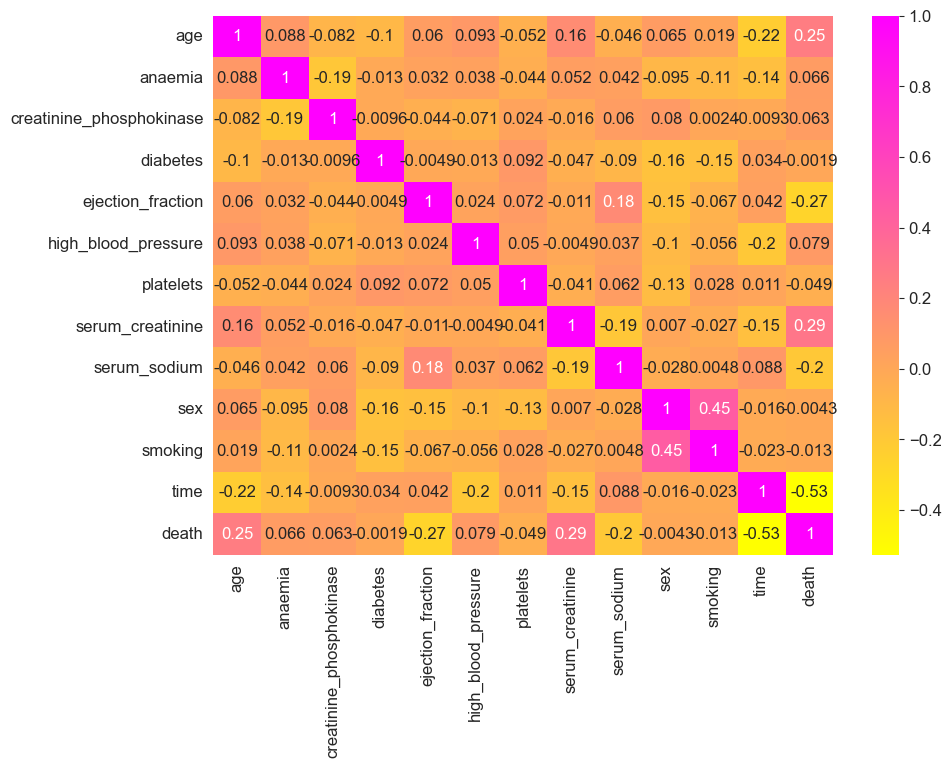

In [5]:
sns.heatmap(data.corr(), annot=True, cmap = "spring_r")
plt.show()

The variables most +/- correlated with the variable death: time, ejection_fraction, serum_creatinine, serum_sodium, age


<AxesSubplot:xlabel='death', ylabel='count'>

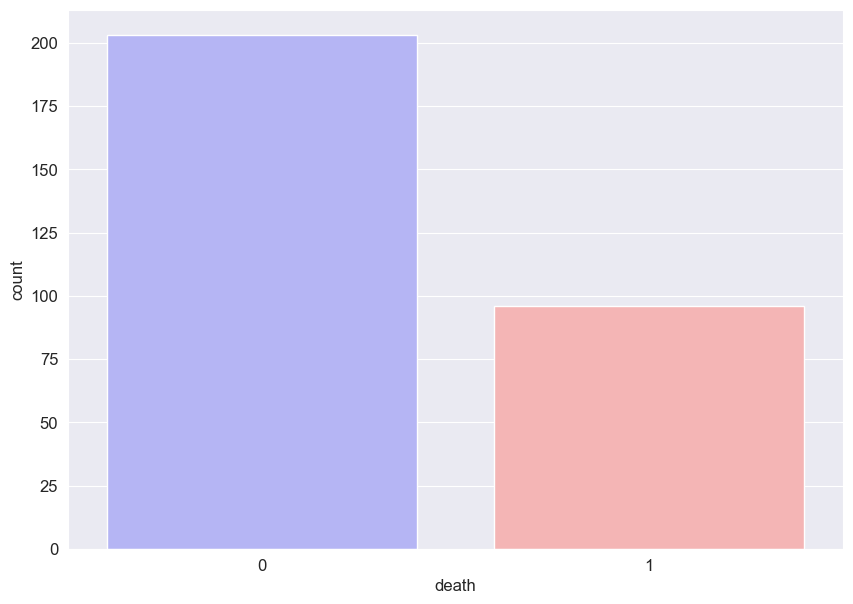

In [6]:
sns.countplot(x = "death", data = data, palette="bwr")

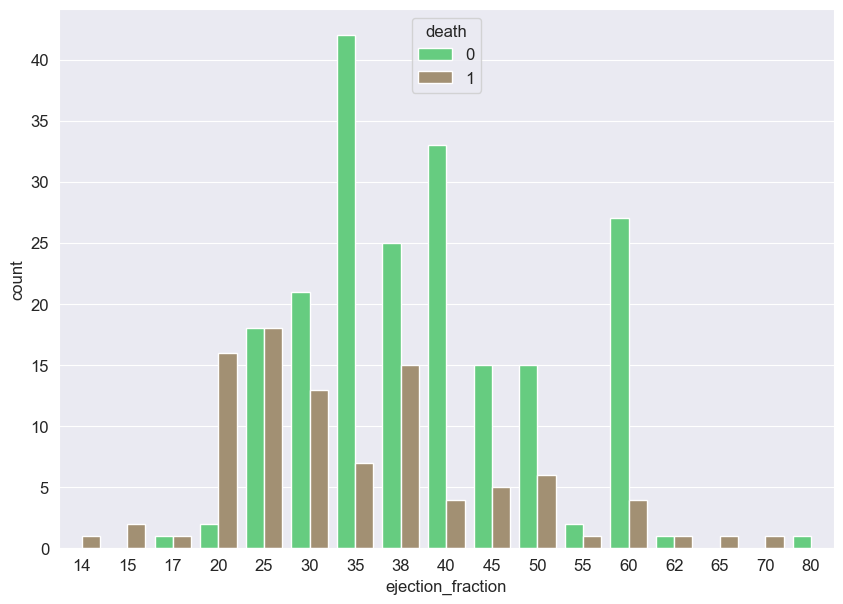

In [7]:
sns.countplot(x = "ejection_fraction", hue = "death", data = data, palette="terrain")
plt.show()

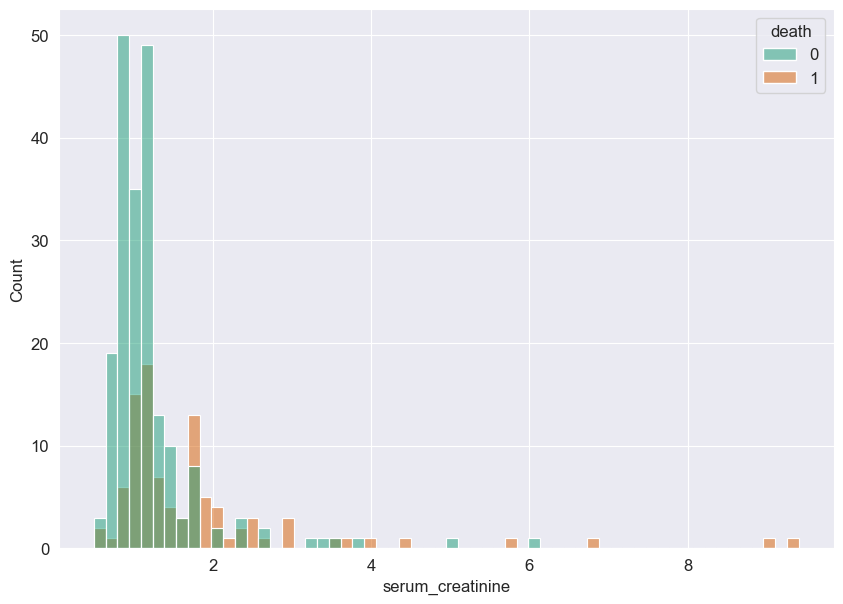

In [8]:
sns.histplot(x = "serum_creatinine", hue = "death",data = data, palette="Dark2")
plt.show()

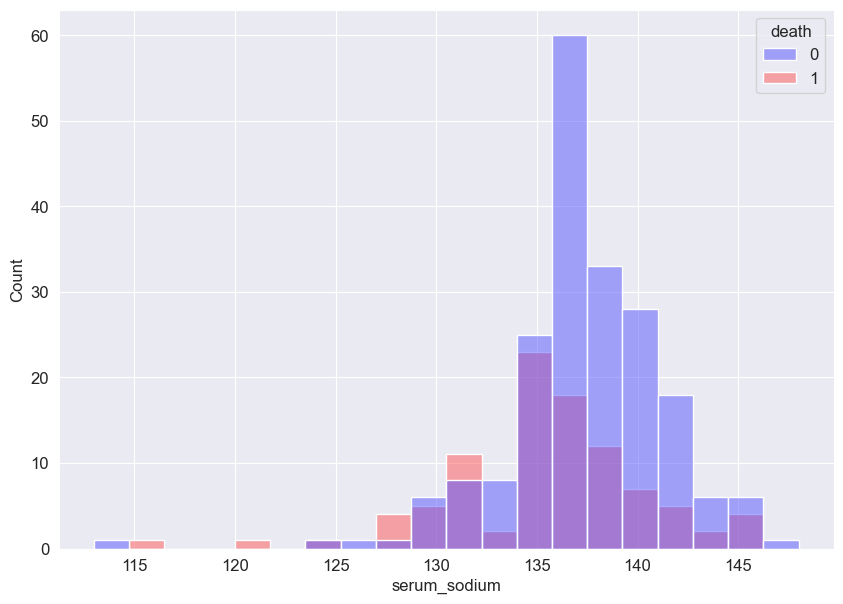

In [9]:
sns.histplot(x = "serum_sodium", hue = "death",data = data, palette="seismic")
plt.show()

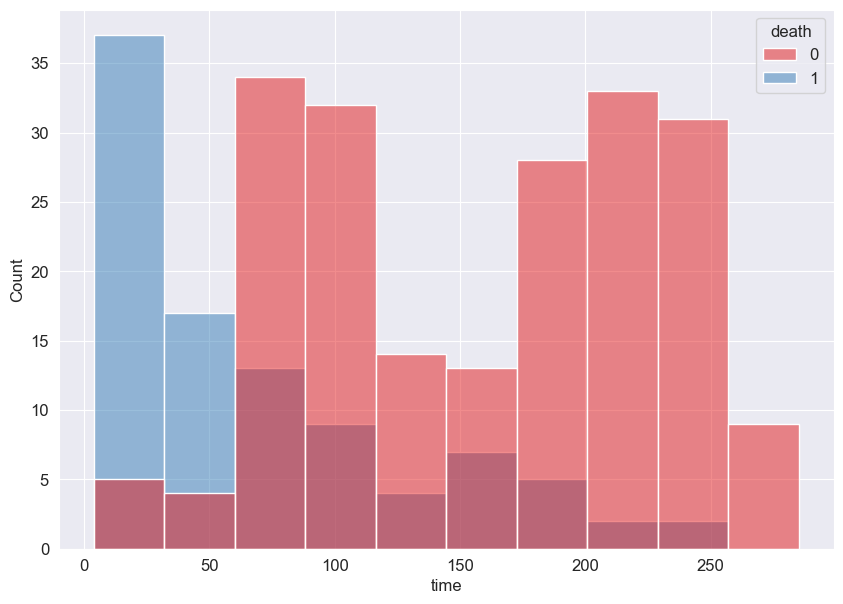

In [10]:
sns.histplot(x = "time",hue="death", data=data,palette = "Set1")
plt.show()

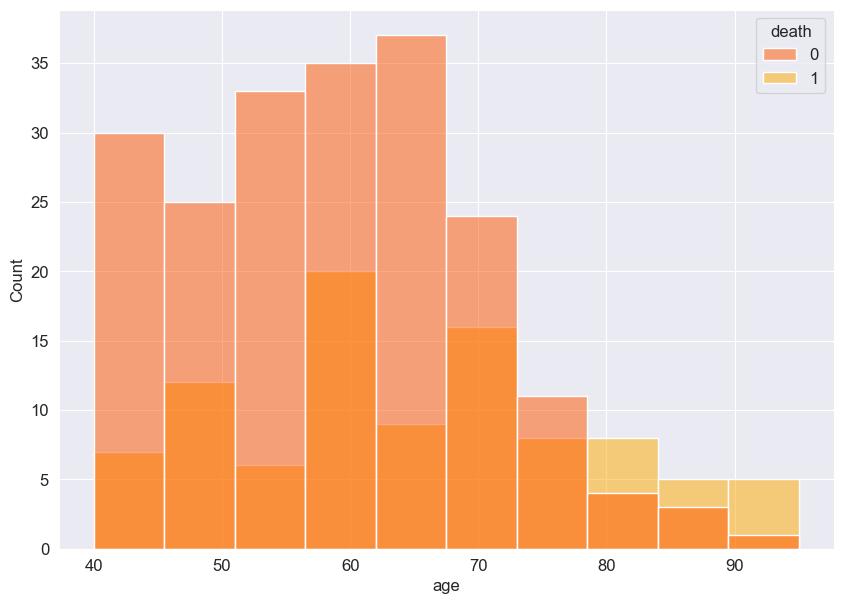

In [11]:
sns.histplot(x = "age",hue="death", data=data,palette = "autumn")
plt.show()

__Q2:__ Was there anything interesting you learned from your plots? If so, what?

We found out that the chance's of surviving are much higher than not surviving.

__Q3:__ Is there anything the data did not tell you that you expected to see?

No, the data clearly shows that the chances of surviving is much higher than that of dying.

### Part 2: Logistic Regression

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be largely on your own, with less detailed instructions. If you have any questions, check out your previous labs, the lecture notes, or the just google the specific function to see how to use it.

First, let's scale and then split the data. You choose what test_size to use. For the scalar, we know that most of our features do not follow a normal distribution (as most are categorical variables), so we will use the MinMaxScaler(). Create the following:

- train_x    (pandas df)
- test_x     (pandas df)    
- train_y    (array)
- test_y     (array)

In [12]:
x = data.drop("death", axis=1)
y = data["death"]
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_df = pd.DataFrame(data = x_scaled, columns=x.columns)
xTrain, xTest, yTrain, yTest = train_test_split(x_df,y, test_size=0.2)
x_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


Create a Logistic Regression Model and output the accuracy on the training and testing set

In [13]:
lr = LogisticRegression()
lr.fit(xTrain, yTrain)

pred_test = lr.predict(xTest)
print(" Training Accuracy\n",lr.score(xTest,yTest))

 Training Accuracy
 0.7833333333333333


In [14]:
pred_train = lr.predict(xTrain)
print(" Testing Accuracy\n", lr.score(xTrain,yTrain))

 Testing Accuracy
 0.8619246861924686


__Q4:__ What interval are the outputs of a logistic regression model contained in?

The interval are contained between 0 and 1

__Q5:__ How does a Logistic Regression model classify data in a binary way?

Logistic Regression will output between 0 and 1 and to classify the data there is a decision boundary set at 0.5 and if the data predicts greater than the boundary line then it will belong to class 1, and if it's below the boundary line then it belongs to class 0.

Create a confusion matrix for the testing data.

Add ```plt.grid(b=None)``` after your code if you get gridlines

[[38  4]
 [ 9  9]]


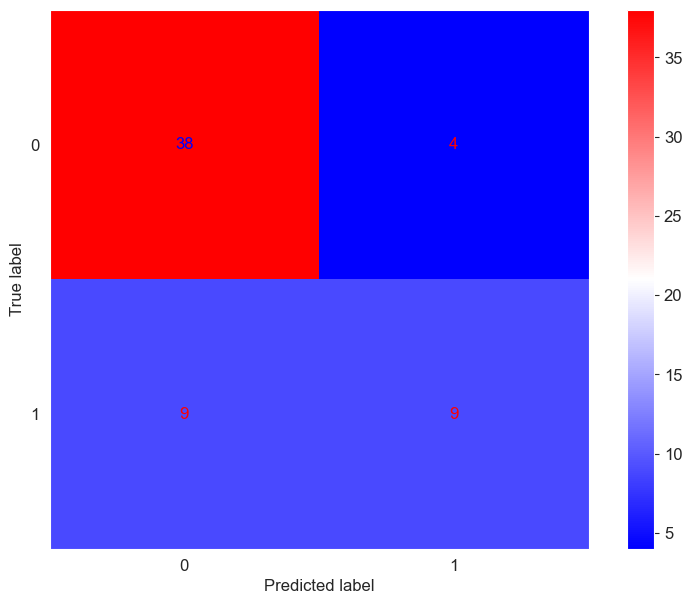

In [15]:
cm = confusion_matrix(yTest, pred_test)
print(cm)
dm = ConfusionMatrixDisplay(confusion_matrix=cm)
dm.plot(cmap="bwr")
plt.grid(b = None)
plt.show()

Print the recall

In [20]:
TP, FP, FN, TP = cm.ravel()
print("Recall: ",(TP/(TP+FN)))

Recall:  0.5


__Q6:__ What does the recall represent (Don't just tell me the formula)?

It represents the true positive rate to the total number of actual positive instances.

Print the precision

In [21]:
print("Precision: ",(TP/(TP+FP)))

Precision:  0.6923076923076923


__Q7:__ What does the precision represent (Don't just tell me the formula)?

It represents the amount of correct positive prediction to the total predicted positive instances

__Q8:__ Which types of errors would be more costly for this problem, False Positives or False Negatives? Why?

False Negative are more costly because it can predict a patient will survive when in actuality they are dead💀. That is the reason to minimize the False Negative in this data.

Now, let's plot the predictions to try and get an idea of how our model performed. Plot the probability predictions of class label 1 (death), not the classification.

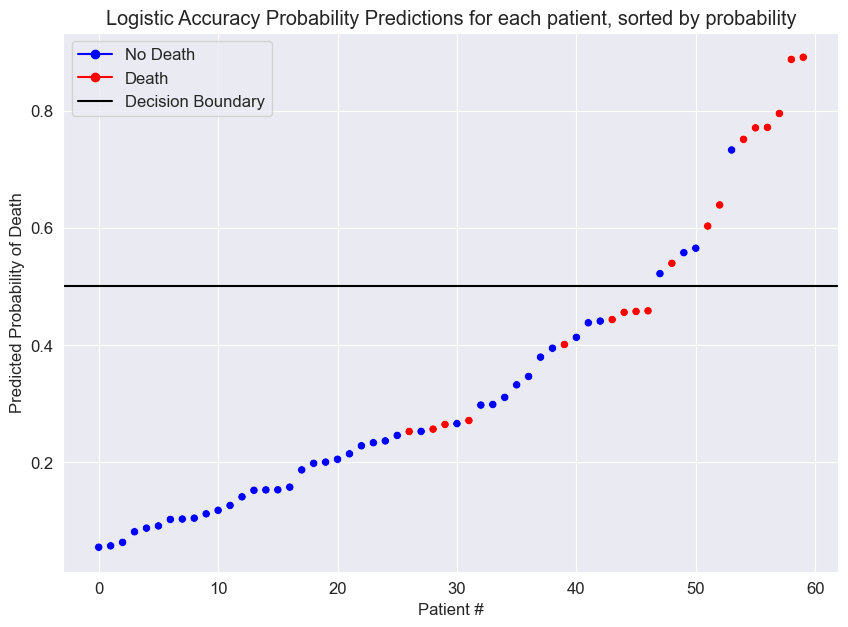

In [18]:
y_pred_prob = lr.predict_proba(xTest)[:, 1]

res = pd.DataFrame({"pred":pred_test, "probability":y_pred_prob, "actual":np.array(yTest)})
res = res.sort_values(by=["probability"])
colors = np.where((res['actual']==1), 'red', 'blue')


sns.scatterplot(x=range(len(res['pred'])), y=res['probability'], c=colors)


plt.axhline(0.5, color='k', linestyle='-')

plt.plot([], [], color='blue', marker='o', label='No Death')
plt.plot([], [], color='red', marker='o', label='Death')
plt.plot([], [], 'k', label='Decision Boundary')
plt.legend()

plt.title('Logistic Accuracy Probability Predictions for each patient, sorted by probability')
plt.xlabel('Patient #')
plt.ylabel('Predicted Probability of Death')
plt.show()


__Q9:__ Does this plot tell us anything interesting about our model? How well does it classify the data?

The plot tells us that the model is more confident that patients above the boundary line are more likely to die than those below the boundary line. This also tells us that the model predicts more patients to survive than die.

Create a data frame of the coefficients of the model

In [19]:
coef_df =pd.DataFrame({"Features":x_df.columns,"Coefficient":lr.coef_[0]})
coef_df

,Features,Coefficient
0,age,1.248700
1,anaemia,-0.073458
2,creatinine_phosphokinase,0.429099
3,diabetes,-0.082729
4,ejection_fraction,-2.226457
5,high_blood_pressure,-0.036035
6,platelets,-0.460112
7,serum_creatinine,1.814624
8,serum_sodium,-1.010232
9,sex,0.006915


__Q10:__ What do these coefficients mean? How are they calculated?

The coefficients represent the log odds of the target variable. They are calculated using the maximum likelihood estimation

__Q11__: Based on that, which features are important to the model?

The features most important are age, serum_creatinine, serum_sodium, and ejection_fraction

Do any other analysis you see fit, whether exploring the data more, assessing the model more intensely, etc.

Finally, write your final report about your conclusions. Remember, you should write 1 - 2 paragraphs about what you did, why you did it, and what it means for the stakeholder. I _don't_ just want a summary of the work you did. I know what you did. I want to know what the analysis told you about the data. 

The data set included attributes related to heart disease and predicted whether a patient will survive or not. We start by exploring the data and seeing which variables where more correlated with the target variable. After seeing the most correlated variables with the target variable we then plotted to check if the patient survived or not with the variables. We then split the data into training and test sets and trained the logistic regression model using the training data. We then saw the accuracy for the training and test data which where close to 80%.

After we then created a confusion matrix to check the precision and sensitivity of the predicted values from the model and found the precision score to be higher than recall score. We then plotted the predicited probability of death which showed that patients survived more by a large margin than not surviving.